# Retaining employees using data analytics

**Objective:** In this case study, we will visualize two paths of attributes that affect loyalty and dissatisfaction among employees. The business case is formed around the question: Can we predict those employees who are likely to leave the organization?

To answer this question, we will:
- Perform any initial data preparations. 
- Split the data into training and validation.
- Develop an initial model.
- Which are the most important variables.
- Report on the accuracy of the model.
- Interpreting two complete paths. 

**Note:** This is a simulated dataset that uses several measures, such as customer satisfaction ratings, employee evaluation, average number of projects and so forth, to predict which employees are at a risk to leave the company.

## Import libraries

In [47]:
# install and load libraries
install.packages("gmodels")

# for data import
library(readr)
library(readr)

# for data wrangling
library(tidyverse)
library(tidyr)

# for visualization 
library(gmodels)
library(reshape2)
library(scales)
library(ggthemes)
library(ggthemes)
library(dplyr)
library(ggplot2)

# for building classification and regression trees
library(rpart)
library(rpart.plot)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## Data exploration and preparation

There are eight continuous variables and two categorical variables in the data set that offers information about 14999 employees. Continuous variables are those with numerical values, and categorical variables group things into category headers, like “Departments” that can have values similar to sales, marketing, consumer, operations, and so on.

The variables are explained in the data dictionary below:

- satisfaction_level: Satisfaction ratings of the job of an employee
- last_evaluation: Rating between 0 to 1, received by an employer over their job performance during the last evaluation
- number_projects: Number of projects an employee is involved in
- average_monthly_hours: The average number of hours in a month, spent by an employee at the office
- time spent_company: Number of years spent in the company
- work_accident: 0-no accident during employee stay, 1 accident during employee stay
- promotion_last 5 years: Number of promotions in the employee’s stay period
- resigned: 0 indicates the employee stays in the company, 1 indicates-the employee who resigned from the company
- salary_grade: Salary earned by an employee
- department: the department to which an employee belongs

In [15]:
# load data into dataframe
HR_comma_sep <- read_csv("HR_comma_sep.csv")

# first rows of dataset
head(HR_comma_sep, 10)

Parsed with column specification:
cols(
  satisfaction_level = col_double(),
  last_evaluation = col_double(),
  number_project = col_integer(),
  average_montly_hours = col_integer(),
  time_spend_company = col_integer(),
  Work_accident = col_integer(),
  resigned = col_integer(),
  promotion_last_5years = col_integer(),
  department = col_character(),
  salary_grade = col_character()
)


satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,resigned,promotion_last_5years,department,salary_grade
0.38,0.53,2,157,3,0,1,0,sales,low
0.80,0.86,5,262,6,0,1,0,sales,medium
0.11,0.88,7,272,4,0,1,0,sales,medium
0.72,0.87,5,223,5,0,1,0,sales,low
0.37,0.52,2,159,3,0,1,0,sales,low
0.41,0.50,2,153,3,0,1,0,sales,low
0.10,0.77,6,247,4,0,1,0,sales,low
0.92,0.85,5,259,5,0,1,0,sales,low
0.89,1.00,5,224,5,0,1,0,sales,low
0.42,0.53,2,142,3,0,1,0,sales,low


Using department, salary_grade as id variables


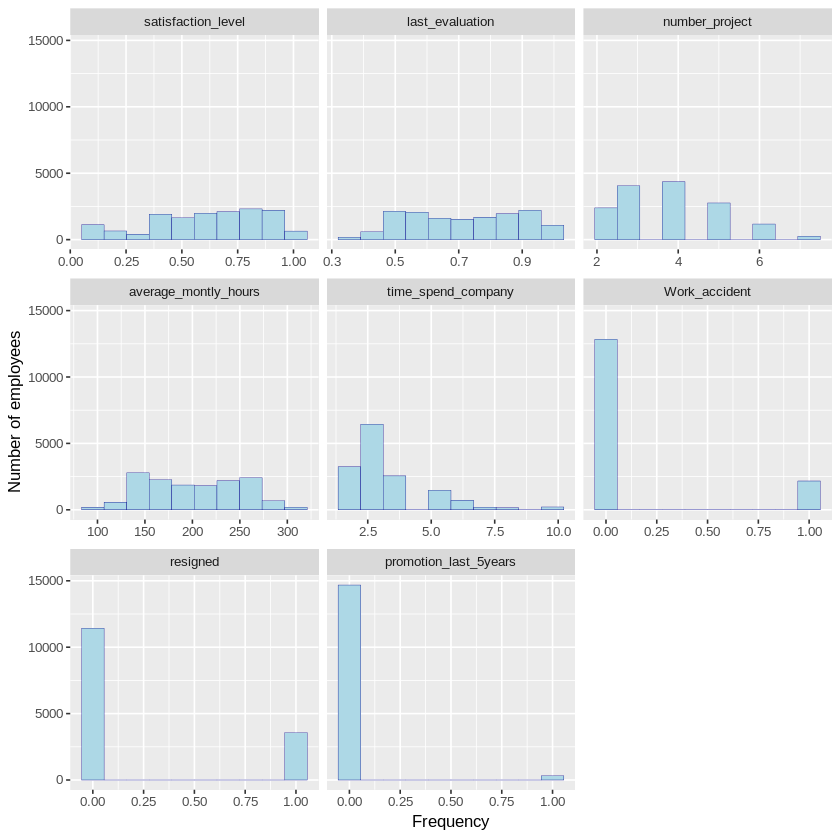

In [16]:
# visualizing continous variables

theme_set(theme_gray(base_size = 10))

d <- melt(HR_comma_sep)
ggplot(d,aes(x = value)) +  
    facet_wrap(~variable,scales = "free_x") + 
    geom_histogram(bins = 10, fill = "lightblue", colour = "darkblue", size = .1) +
  scale_y_continuous( name = "Number of employees" ) +
  scale_x_continuous( name = "Frequency" ) 

### Plotting No. of Employees and Frequency
- Satisfaction level: Most employees are highly satisfied.
- Last evaluation: Most employees are good performers with 75% of the data set being evaluated between 56%-87%.
- Number of projects: most employees do a reasonable number of projects.
- Average monthly hours: Most employees spend, fairly, a higher number of hours at work.
- Time spent in the company: Fewer employees stay beyond 4 years.

### Exploring work_accident
- Most employees did not have accidents at work.

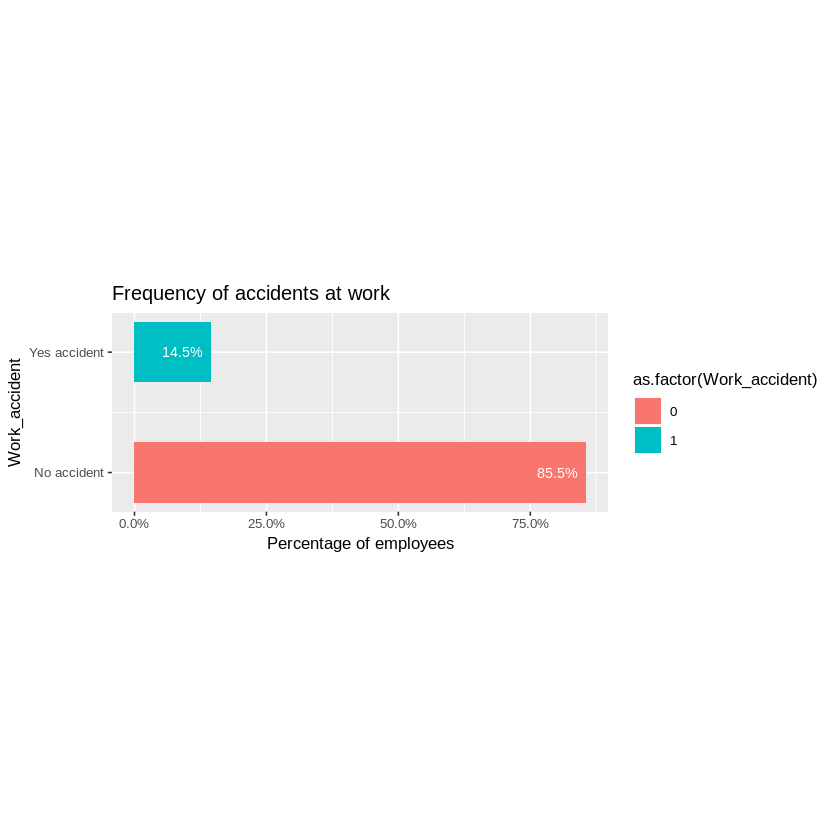

In [30]:
# second glance at the binary continous variable: Work_accident 

wa <- ggplot(data=HR_comma_sep, aes(x=Work_accident, fill=as.factor(Work_accident))) + 
                                scale_x_continuous(breaks=0:1,
                                labels = c("No accident" , "Yes accident")) +
      geom_bar(width=0.5,
               (aes(y = (..count..)/sum(..count..))))+
      scale_y_continuous(labels = scales::percent) + 
      geom_text(aes(label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..)), stat= "count", vjust =.5, hjust= 1.2, size=3, color='white') +
      labs(title = "Frequency of accidents at work",
               y = "Percentage of employees") +
      theme(aspect.ratio = .4) +
      coord_flip()  

wa

### Exploring resigned
- Most employees stayed with the organization and did not leave.

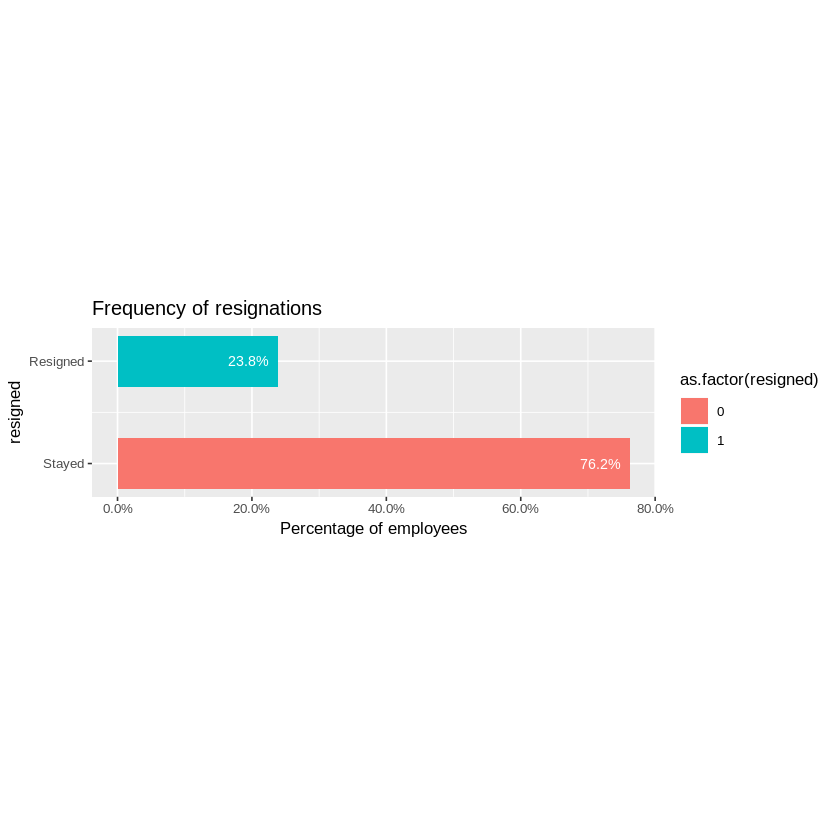

In [24]:
# second glance at the binary continous variable: resigned

re <- ggplot(data=HR_comma_sep, aes(x = resigned , fill=as.factor(resigned))) + 
                                scale_x_continuous(breaks=0:1,
                                labels = c("Stayed" , "Resigned")) +
      geom_bar(width=0.5,
               (aes(y = (..count..)/sum(..count..))))+
      scale_y_continuous(labels = scales::percent) + 
      geom_text(aes(label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..)), stat= "count", vjust =.5, hjust= 1.2, size=3, color='white') + 
      labs(title = "Frequency of resignations",
               y = "Percentage of employees") +
      theme(aspect.ratio = .3) +
      coord_flip()  

re

### Exploring promotion in last 5 years
- Most people have not recieved a promotion in the last five years.

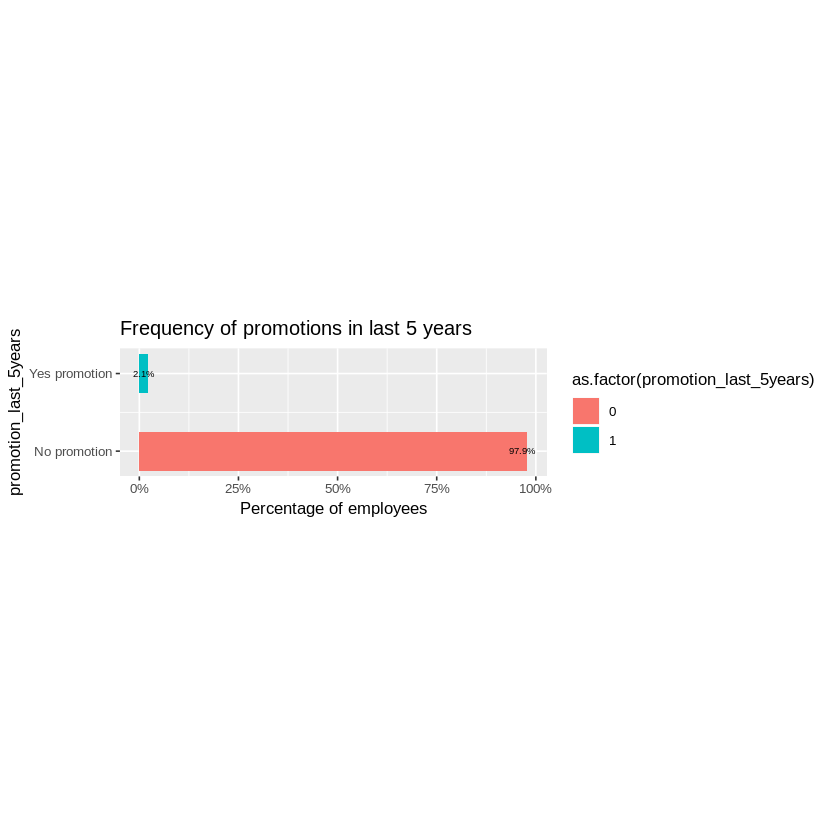

In [25]:
# second glance at the binary continous variable: promotion in last 5 years

pro <- ggplot(data=HR_comma_sep, aes(x = promotion_last_5years , fill=as.factor(promotion_last_5years))) + 
                                scale_x_continuous(breaks=0:1,
                                labels = c("No promotion" , "Yes promotion")) +
      geom_bar(width=0.5,
               (aes(y = (..count..)/sum(..count..))))+
      scale_y_continuous(labels = scales::percent) + 
      geom_text(aes(label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..)), stat= "count", vjust =.5, hjust= .7, size=2, color='black') +
      labs(title = "Frequency of promotions in last 5 years",
               y = "Percentage of employees") +
      theme(aspect.ratio = .3) +
      coord_flip()  

pro

### Exploring salary grade
- 8.2% of the organization from the top level with the highest pay, 42.9% of the employees are paid a medium salary and 48.7% of the employees are paid a low salary.

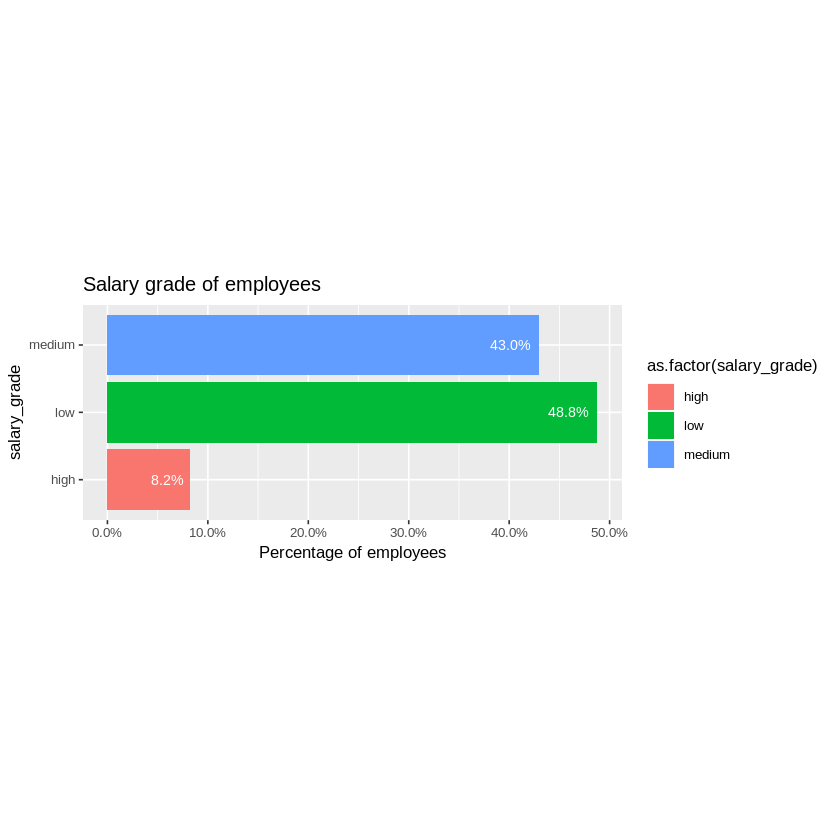

In [26]:
# visualizing categorical variables

# salary_grade
sg <- ggplot(data=HR_comma_sep, aes(x = salary_grade , fill=as.factor(salary_grade))) + 
      geom_bar(width=0.9,
               (aes(y = (..count..)/sum(..count..))))+
      scale_y_continuous(labels = scales::percent) + 
      geom_text(aes(label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..)), stat= "count", vjust =.5, hjust= 1.2, size=3, color='white') +
      labs(title = "Salary grade of employees",
               y = "Percentage of employees") +
      theme(aspect.ratio = .4) +
      coord_flip()

sg

### Exploring department
- The department ‘sales’ has the highest number of employees at 27% and management the lowest which forms only 4.2%.

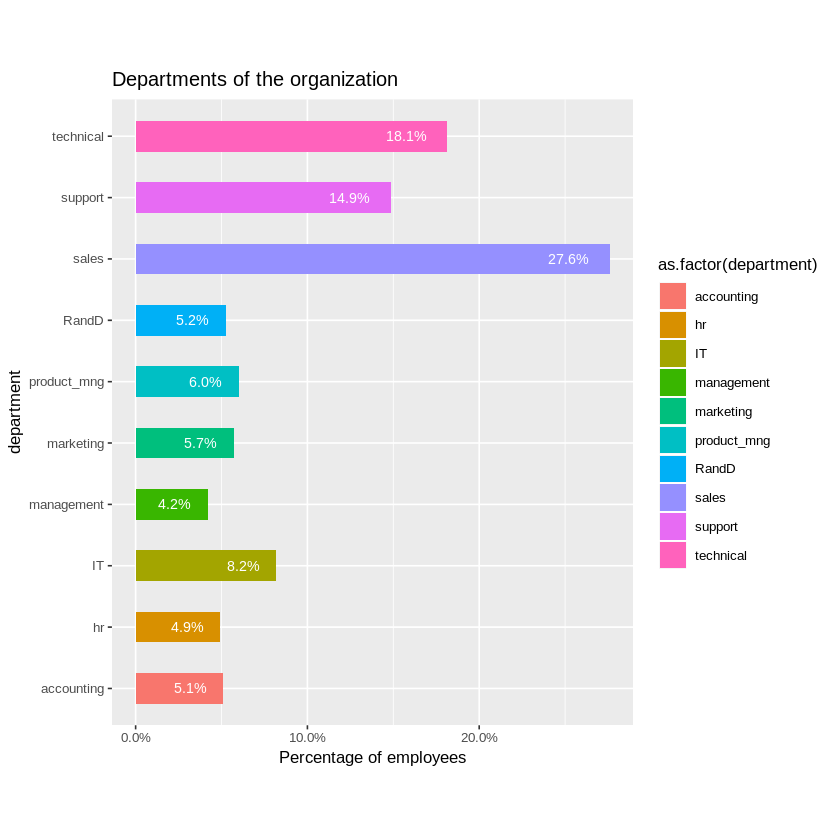

In [31]:
# department
dp <- ggplot(data=HR_comma_sep, aes(x = department , fill=as.factor(department))) + 
      geom_bar(width=0.5,
               (aes(y = (..count..)/sum(..count..))))+
      scale_y_continuous(labels = scales::percent) + 
      geom_text(aes(label = scales::percent((..count..)/sum(..count..)),
                   y= (..count..)/sum(..count..)), stat= "count", vjust = 0.5, hjust= 1.5, size=3, color='white') +
      labs(title = "Departments of the organization",
               y = "Percentage of employees") +
      theme(aspect.ratio = 1.2) +
      coord_flip()

dp

## Split data into training and validation

We will split the data into two parts: training and validation but let’s understand why we do that. We train humans to perform a skill. Similarly, we can train the algorithm to perform. To train a human, we let them practice towards perfecting their ability. But for algorithms, we input data so that they can learn.
The algorithm identifies the pattern in the data and learns the intricacies and nuances of that pattern to build an ability to predict accurately. Therefore, we split our dataset so that we can test the trained model on a representative dataset where we already know the correct predictions. This will let us know how well the model that we trained is performing.

But before we train the model, we will create factors of the following variables:

- Department: Represents the number of employees in each department. There are a total of 10 departments. Department Sales has the highest number of employees at 27% and management the lowest which forms only 4.2%.
- Salary grade: Represents the salary as low medium and high. 8.25% of the organization are top level with the highest pay, 42.9% of the employees are paid a medium salary and 48.7% of the employees are paid a low salary.
- Resigned: In this, 0 denotes who stayed and 1 denotes who resigned from the organization.

We create factors when we wish that each type within a variable be treated as a category. For example, in R’s memory, factorizing the variable ‘department’ will mean treating, ‘low,’ ‘high,’ and ‘medium’ as individual categories. This ensures that the modeling functions treat each type correctly.

In [33]:
# Creating factors of categorical variables and binary, continous variable resigned

hr <- HR_comma_sep %>% 
  mutate(salary_grade = as.factor(salary_grade) ,
         department = as.factor(department),
         resigned = as.factor(resigned),
         random = runif(14999))

# rename factor levels of variable 'resigned'
levels(hr$resigned) <- c("stayed", "resigned") 

print((summary(hr$resigned))) 

  stayed resigned 
   11428     3571 


In [34]:
print((summary(hr$salary_grade)))

  high    low medium 
  1237   7316   6446 


In [35]:
print((summary(hr$department)))

 accounting          hr          IT  management   marketing product_mng 
        767         739        1227         630         858         902 
      RandD       sales     support   technical 
        787        4140        2229        2720 


In [36]:
# Splitting the data into training and validation sets
set.seed(123)
train <- hr %>% 
  filter(random < .7) %>% 
  select(-random)

val <- hr %>% 
  filter(random >= .7) %>% 
  select(-random)

## Creating regression tree: Initial model
The initial model is developed on the training data set.

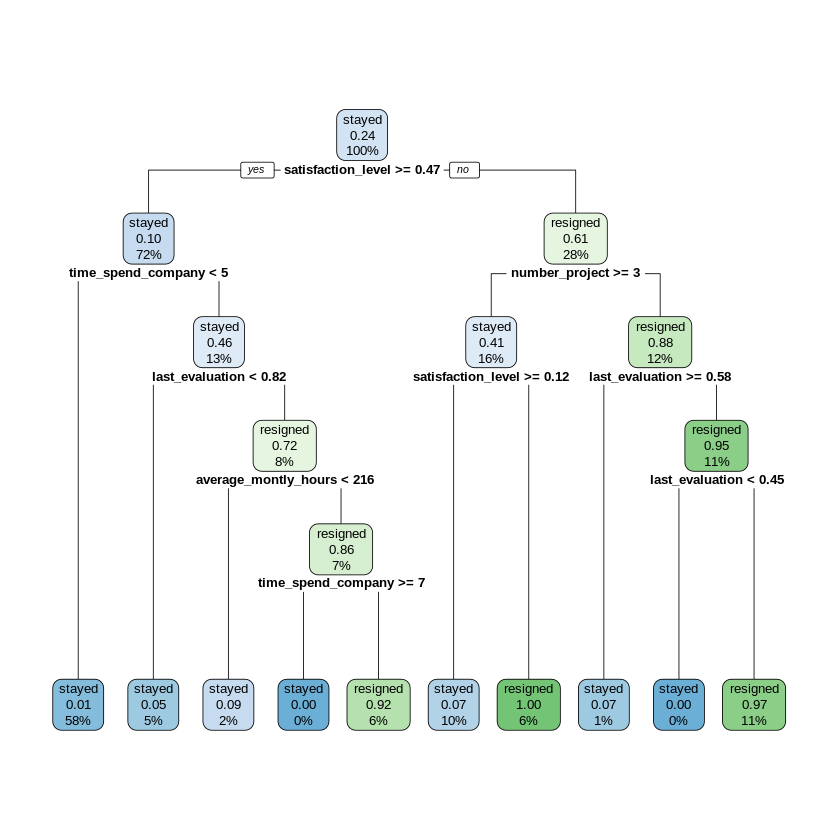

In [37]:
# creating the initial model
ct1 <- rpart(resigned ~ . , data = train, method = 'class')

# plotting the model
rpart.plot(ct1)

### How to read the tree?
- 1 denotes ‘resigned,’ and 0 denotes ‘stayed’
- At the top when no condition is applied to the training data set (train) the best guess is determined as 0 (stayed)
- Of the total observations 76% did not leave and 24% left

In [38]:
# complexity parameter table
ct1$cptable

,CP,nsplit,rel error,xerror,xstd
1,0.24960317,0,1.0000000,1.0000000,0.017366008
2,0.18710317,1,0.7503968,0.7503968,0.015625085
3,0.07380952,3,0.3761905,0.3761905,0.011653438
4,0.05158730,5,0.2285714,0.2297619,0.009281552
5,0.03095238,6,0.1769841,0.1785714,0.008235561
6,0.01666667,7,0.1460317,0.1476190,0.007516876
7,0.01071429,8,0.1293651,0.1305556,0.007084088
8,0.01000000,9,0.1186508,0.1246032,0.006925814


### Interpreting Two Complete Paths:

#### Path 1: Will Not Leave (Stayed/loyal)
- First condition: satisfaction_level >= 47 percent.
- Second condition: time_spend_company < 5 years.
- Third condition: last_evaluation < 81 percent.

Hence, those who stayed are highly satisfied, have spent at least 4 years in the organization, and are good performers with an evaluation of at least 80 percent.

#### Path 2: Will Leave (resign)
- First condition: satisfaction_level < 47 percent.
- Second condition: number_project >= 3 projects.
- Third condition: last_evaluation >= 58 percent.

Hence, those who leave are lowly or moderately satisfied, have a workload of 3 or more projects with their performance being evaluated at least 58 percent.

In [39]:
print(var_importance <- data.frame(ct1$variable.importance)) 

                      ct1.variable.importance
satisfaction_level                2164.097114
number_project                    1115.591165
average_montly_hours              1063.678223
last_evaluation                   1046.339780
time_spend_company                 833.719180
Work_accident                       30.319609
promotion_last_5years                4.779299
department                           2.638878


In [41]:
# how good is our initial model(ct1)?

val$resign_predicted <- predict(ct1, val, type = 'class')
print(summary(val))

 satisfaction_level last_evaluation  number_project average_montly_hours
 Min.   :0.0900     Min.   :0.3600   Min.   :2.00   Min.   : 96.0       
 1st Qu.:0.4400     1st Qu.:0.5600   1st Qu.:3.00   1st Qu.:156.0       
 Median :0.6500     Median :0.7300   Median :4.00   Median :202.0       
 Mean   :0.6179     Mean   :0.7187   Mean   :3.82   Mean   :201.7       
 3rd Qu.:0.8200     3rd Qu.:0.8700   3rd Qu.:5.00   3rd Qu.:245.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.00   Max.   :310.0       
                                                                        
 time_spend_company Work_accident        resigned    promotion_last_5years
 Min.   : 2.000     Min.   :0.0000   stayed  :3449   Min.   :0.00000      
 1st Qu.: 3.000     1st Qu.:0.0000   resigned:1051   1st Qu.:0.00000      
 Median : 3.000     Median :0.0000                   Median :0.00000      
 Mean   : 3.475     Mean   :0.1447                   Mean   :0.02111      
 3rd Qu.: 4.000     3rd Qu.:0.0000       

In [44]:
# rename factor levels of variable 'resigned_predicted'
levels(val$resign_predicted) <- c("predicted_stay", "predicted_resign") 
print(summary(val$resign_predicted))

  predicted_stay predicted_resign 
            3506              994 


In [48]:
# Crosstable of actual resignations versus predicted resignation values by initial model

CrossTable(val$resigned , val$resign_predicted)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  4500 

 
             | val$resign_predicted 
val$resigned |   predicted_stay | predicted_resign |        Row Total | 
-------------|------------------|------------------|------------------|
      stayed |             3411 |               38 |             3449 | 
             |          194.984 |          687.741 |                  | 
             |            0.989 |            0.011 |            0.766 | 
             |            0.973 |            0.038 |                  | 
             |            0.758 |            0.008 |                  | 
-------------|------------------|------------------|------------------|
    resigned |               95 |              956 |             1051 | 
             |          639.867 |         2256.917

### Summary

#### Characterizing loyalty

11,428 employees, which is, 76% of the data set are loyal. Three conditions that affect loyalty are:
- a high level of satisfaction (satisfaction_level >= 47%)
- have spent at least 4 years in the organization (time_spend_company < 5 years)
- are good performers with an evaluation of at least 80% (last_evaluation < 81%)

#### Characterizing left

3,571 employees, which is, 24% of the data set left. Three conditions that affect ‘resigned’ are:
- low or moderate satisfaction (satisfaction_level < 47%)
- have a workload of 3 or more projects (number_project >= 3 projects) and their performance being evaluated at least 58% (last_evaluation >= 58 %)
- HR analytics, the provenance of a few leading companies, a decade ago, is a solution that is being widely applied now by several growing businesses to uncover surprising sources of talent and counterintuitive insights about what drives employees to be loyal to their organization.

**Initial model is better than the second model in terms of accuracy.**